## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = "left")
combined_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice in the DataFrame.
combined_mouse_study_data['Mouse ID'].value_counts().head()

g989    13
c832    10
m269    10
b879    10
c302    10
Name: Mouse ID, dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_mice = combined_mouse_study_data.set_index('Mouse ID')
mouse = study_data_mice.loc['g989', :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = study_data_mice.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_study_data['Mouse ID'].value_counts().head()

c832    10
r554    10
a897    10
w350    10
y769    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_study_data.describe()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar Plots

In [33]:
initial_volumes = clean_study_data.loc[(clean_study_data["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

for mouse in clean_study_data["Mouse ID"]:
    max_time = clean_study_data.loc[clean_study_data["Mouse ID"] == mouse, "Timepoint"].max()
    vol_final = clean_study_data.loc[(clean_study_data["Timepoint"] == max_time) & (clean_study_data["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
    end_vol = pd.concat([end_vol, vol_final])
    
end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()
vol_change = 100*(end_grouped - init_vol)/init_vol

print(vol_change)

Series([], Name: Tumor Volume (mm3), dtype: float64)


In [34]:
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)

In [71]:
clean_study_data.dtypes
clean_study_data.

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [73]:
counts = clean_study_data["Drug Regimen"].value_counts()
counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

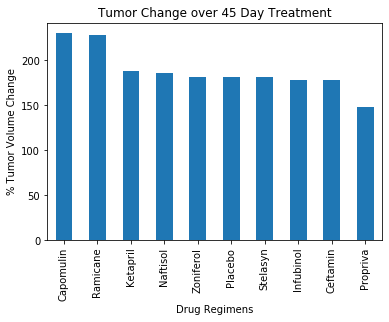

In [79]:
counts.plot(kind="bar")
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drug Regimens")
plt.show()

KeyError: 'Capomulin'

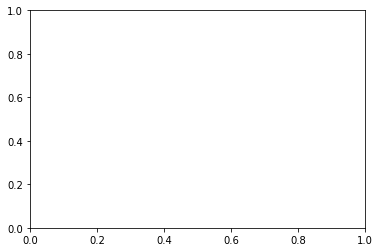

In [35]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
fig, ax = plt.subplots()
x_axis = np.arange(0,4,1)

heights = [vol_change["Capomulin"], vol_change["Ketapril"], vol_change["Placebo"], vol_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(alpha = 0.25)
ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights)+5)
autolabel(barplot, ax)
plt.show()

#Capomulin error

## Pie Plots

In [41]:
# male = clean_study_data['Male'].value_counts()
male_data = study_data_mice.index(male)
female_data = study_data_mice.index = 'female'

TypeError: Index(...) must be called with a collection of some kind, 'Male' was passed

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.title("Female v. Male Dist.")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

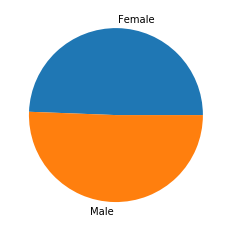

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sums=study_data_mice.groupby('Sex').count()
plt.pie(sums.Timepoint,labels=sums.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


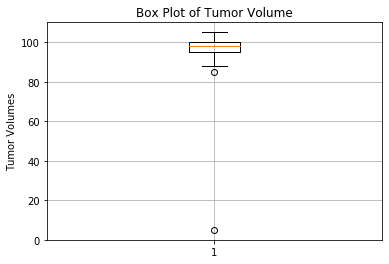

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = clean_study_data.groupby('Tumor Volume (mm3)')

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Tumor Volume')
ax1.set_ylabel('Tumor Volumes')
# ax1.boxplot(times, showmeans=True)
ax1.boxplot(times)
plt.grid()
plt.show()


## Line and Scatter Plots

In [89]:
sub_df = clean_study_data[clean_study_data["Drug Regimen"] == 'Capomulin']
clean_study_data[clean_study_data["Drug Regimen"] == 'Capomulin']['Tumor Volume (mm3)']
clean_study_data[clean_study_data["Drug Regimen"] == 'Capomulin']['Timepoint']

10       0
11       5
12      10
13      15
14      20
        ..
440     45
1439     0
1440     5
1441    10
1442    15
Name: Timepoint, Length: 230, dtype: int64

In [105]:
sub_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


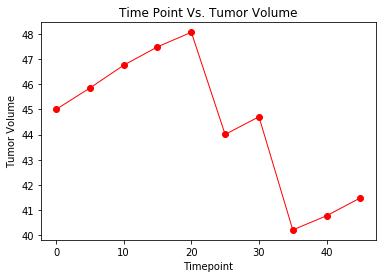

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.title("Time Point Vs. Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

capomulin_volume = clean_study_data[clean_study_data["Drug Regimen"] == 'Capomulin']
mouse_data = sub_df[sub_df['Mouse ID'] == 'l509']

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", color="red", linewidth=1)
plt.show()

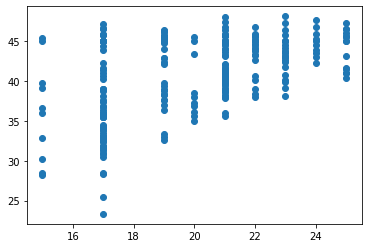

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Casub_dfpomulin regimen
x = sub_df["Weight (g)"]
y = sub_df["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.show()

## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
np.corrcoef(x, y)

array([[1.        , 0.52569956],
       [0.52569956, 1.        ]])